In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
import pandas as pd

# Load the datasets
matches_train = pd.read_csv('matches_train.csv')
job_positions_train = pd.read_csv('job_positions_train.csv')
candidates_train = pd.read_csv('candidates_train.csv')

# Display the first few rows of each dataset
print("\nJob Positions Train Dataset:")
print(job_positions_train.head())
print("\nCandidates Train Dataset:")
print(candidates_train.head())
print("Matches Train Dataset:")
print(matches_train.head())



Job Positions Train Dataset:
     Job_ID  ... Longitudine
0  1739_114  ...     9.33151
1  1606_139  ...     9.18150
2  1636_143  ...     9.18150
3  1739_397  ...     9.33151
4  1739_405  ...     9.33151

[5 rows x 10 columns]

Candidates Train Dataset:
   CANDIDATE_ID  ... Longitudine
0       2654744  ...     7.64182
1       6004814  ...    14.31080
2       6505969  ...    16.14650
3       1366425  ...    10.39070
4       5340632  ...    10.47540

[5 rows x 11 columns]
Matches Train Dataset:
       Job_ID  CANDIDATE_ID  Match
0  0264_22927       1933502      1
1  0553_22671       6016478      1
2    1354_730       6167354      1
3    1526_995       5883294      1
4  0130_11963       5848616      1


In [7]:
# Summary statistics for job_positions_train
print("\nJob Positions Train Dataset Summary:")
print(job_positions_train.describe(include='all'))

# Summary statistics for candidates_train
print("\nCandidates Train Dataset Summary:")
print(candidates_train.describe(include='all'))

# Summary statistics for matches_train
print("Matches Train Dataset Summary:")
print(matches_train.describe())



Job Positions Train Dataset Summary:
          Job_ID                         Prof_cat Hard_skills_group  \
count       2531                             2531              2531   
unique      2531                               50               619   
top     1739_114  Operaio Generico Metalmeccanico        Produzione   
freq           1                              474               440   
mean         NaN                              NaN               NaN   
std          NaN                              NaN               NaN   
min          NaN                              NaN               NaN   
25%          NaN                              NaN               NaN   
50%          NaN                              NaN               NaN   
75%          NaN                              NaN               NaN   
max          NaN                              NaN               NaN   

                      Soft_skills            Education Languages Cards  \
count                        2042  

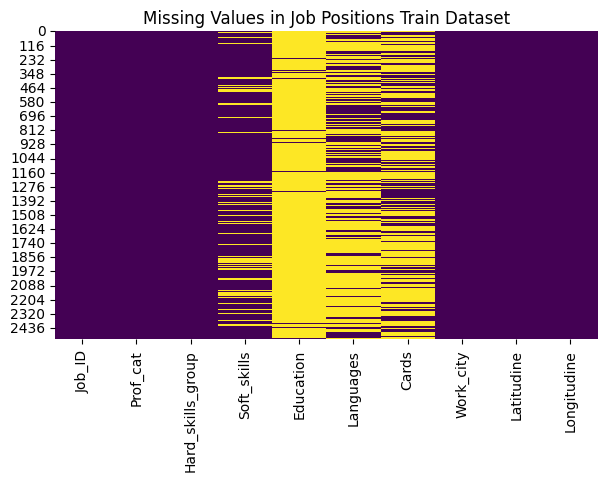

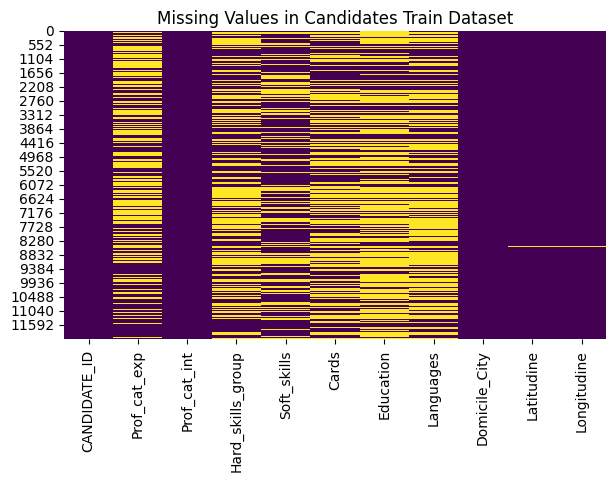

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to visualize missing values
def plot_missing_values(df, title):
    plt.figure(figsize=(7, 4))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

# Visualize missing values
#plot_missing_values(matches_train, "Missing Values in Matches Train Dataset")
plot_missing_values(job_positions_train, "Missing Values in Job Positions Train Dataset")
plot_missing_values(candidates_train, "Missing Values in Candidates Train Dataset")


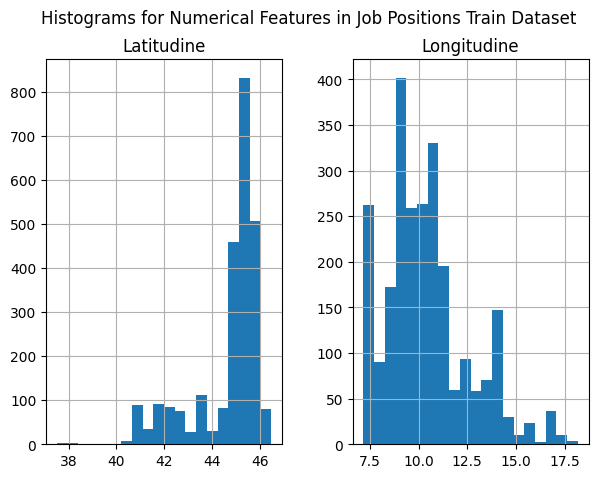

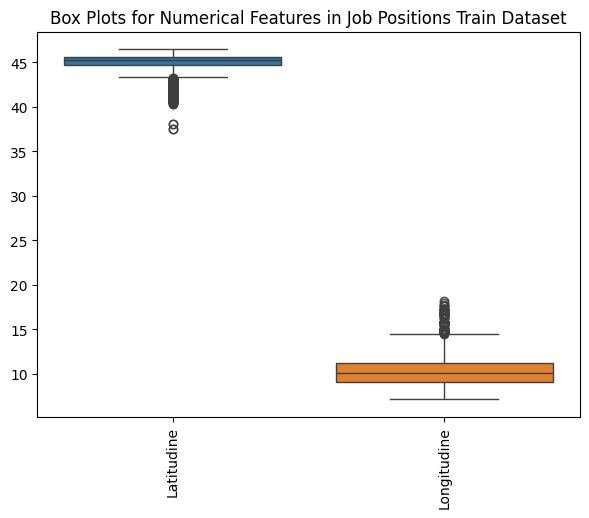

In [14]:
# Plot histograms for numerical features in job_positions_train
job_positions_train.hist(figsize=(7, 5), bins=20)
plt.suptitle("Histograms for Numerical Features in Job Positions Train Dataset")
plt.show()

# Plot box plots for numerical features in job_positions_train
plt.figure(figsize=(7, 5))
sns.boxplot(data=job_positions_train.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plots for Numerical Features in Job Positions Train Dataset")
plt.xticks(rotation=90)
plt.show()


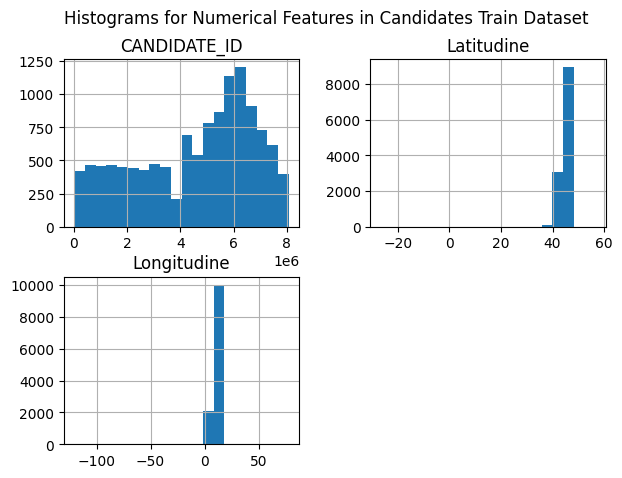

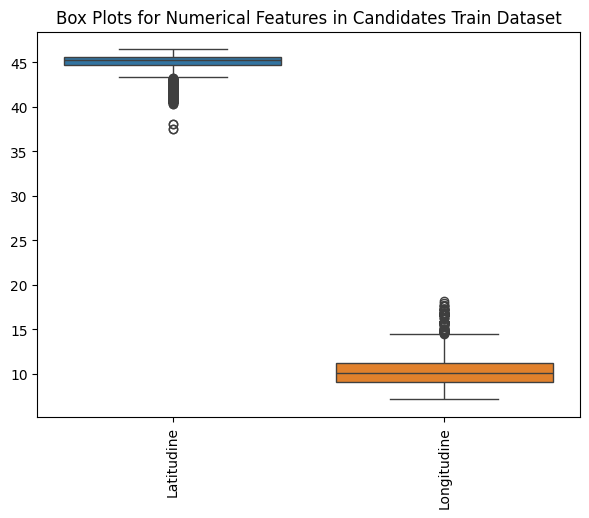

In [17]:
# Plot histograms for numerical features in job_positions_train
candidates_train.hist(figsize=(7, 5), bins=20)
plt.suptitle("Histograms for Numerical Features in Candidates Train Dataset")
plt.show()

# Plot box plots for numerical features in job_positions_train
plt.figure(figsize=(7, 5))
sns.boxplot(data=job_positions_train.select_dtypes(include=['float64', 'int64']))
plt.title("Box Plots for Numerical Features in Candidates Train Dataset")
plt.xticks(rotation=90)
plt.show()


In [17]:
# Plot bar charts for categorical features in job_positions_train
categorical_features = job_positions_train.select_dtypes(include=['object']).columns

In [18]:
categorical_features

Index(['Job_ID', 'Prof_cat', 'Hard_skills_group', 'Soft_skills', 'Education',
       'Languages', 'Cards', 'Work_city'],
      dtype='object')

In [20]:
categorical_features=['Prof_cat','Education','Languages','Cards','Work_city']

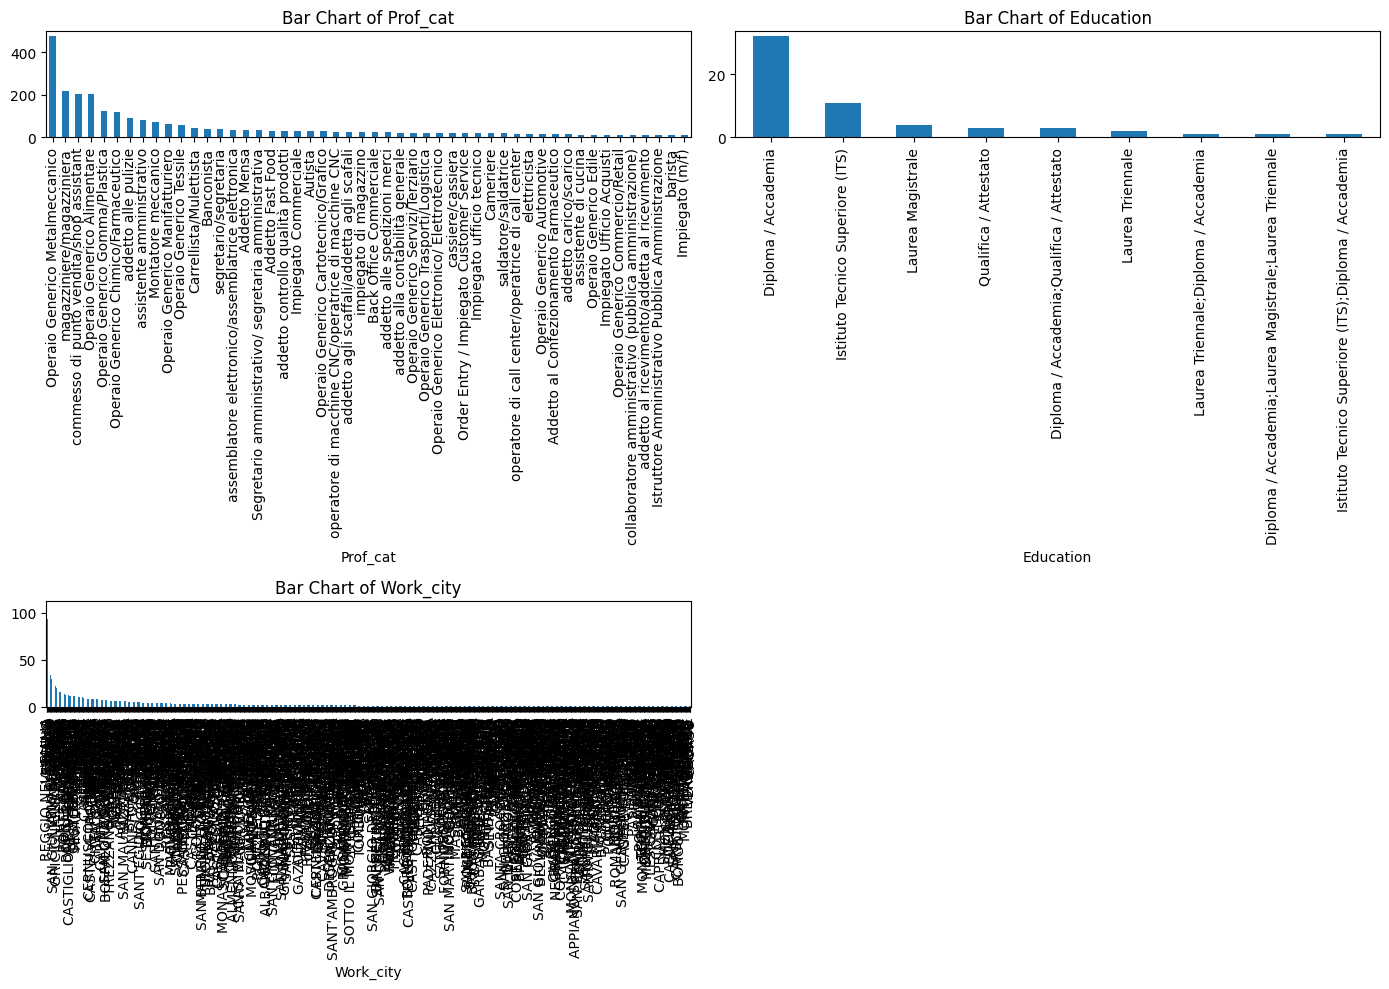

In [16]:
import math
num_features = len(categorical_features)
num_cols = 2  # Number of plots per row
num_rows = math.ceil(num_features / num_cols)  # Number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, num_rows * 5))

for i, feature in enumerate(categorical_features):
    row = i // num_cols
    col = i % num_cols
    job_positions_train[feature].value_counts().plot(kind='bar', ax=axes[row, col])
    axes[row, col].set_title(f"Bar Chart of {feature}")

# Remove empty subplots
for j in range(i + 1, num_rows * num_cols):
    row = j // num_cols
    col = j % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

/var/folders/4j/lfyylb311zz43rwm57kmmfpw0000gn/T/ipykernel_12802/711304129.py:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


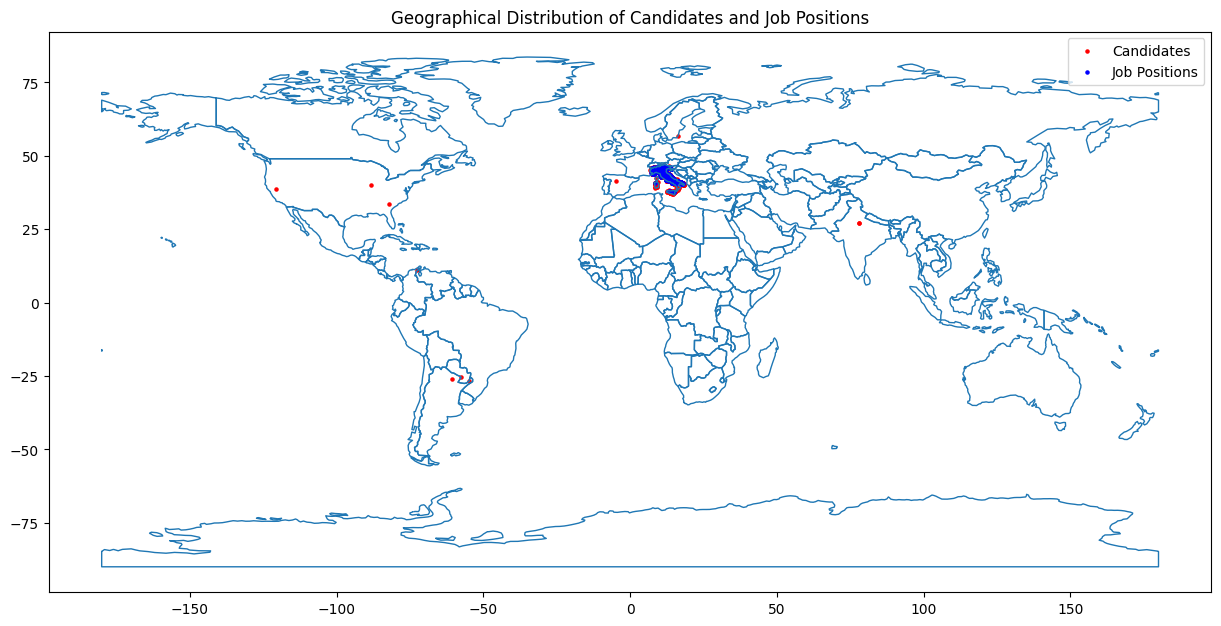

In [31]:
import geopandas as gpd
from shapely.geometry import Point

# Function to create a GeoDataFrame
def create_geodataframe(df, lat_col, lon_col):
    geometry = [Point(xy) for xy in zip(df[lon_col], df[lat_col])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry)
    return gdf

# Create GeoDataFrames
candidates_gdf = create_geodataframe(candidates_train, 'Latitudine', 'Longitudine')
job_positions_gdf = create_geodataframe(job_positions_train, 'Latitudine', 'Longitudine')

# Plot locations
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
candidates_gdf.plot(ax=ax, color='red', markersize=5, label='Candidates')
job_positions_gdf.plot(ax=ax, color='blue', markersize=5, label='Job Positions')
plt.title("Geographical Distribution of Candidates and Job Positions")
plt.legend()
plt.show()


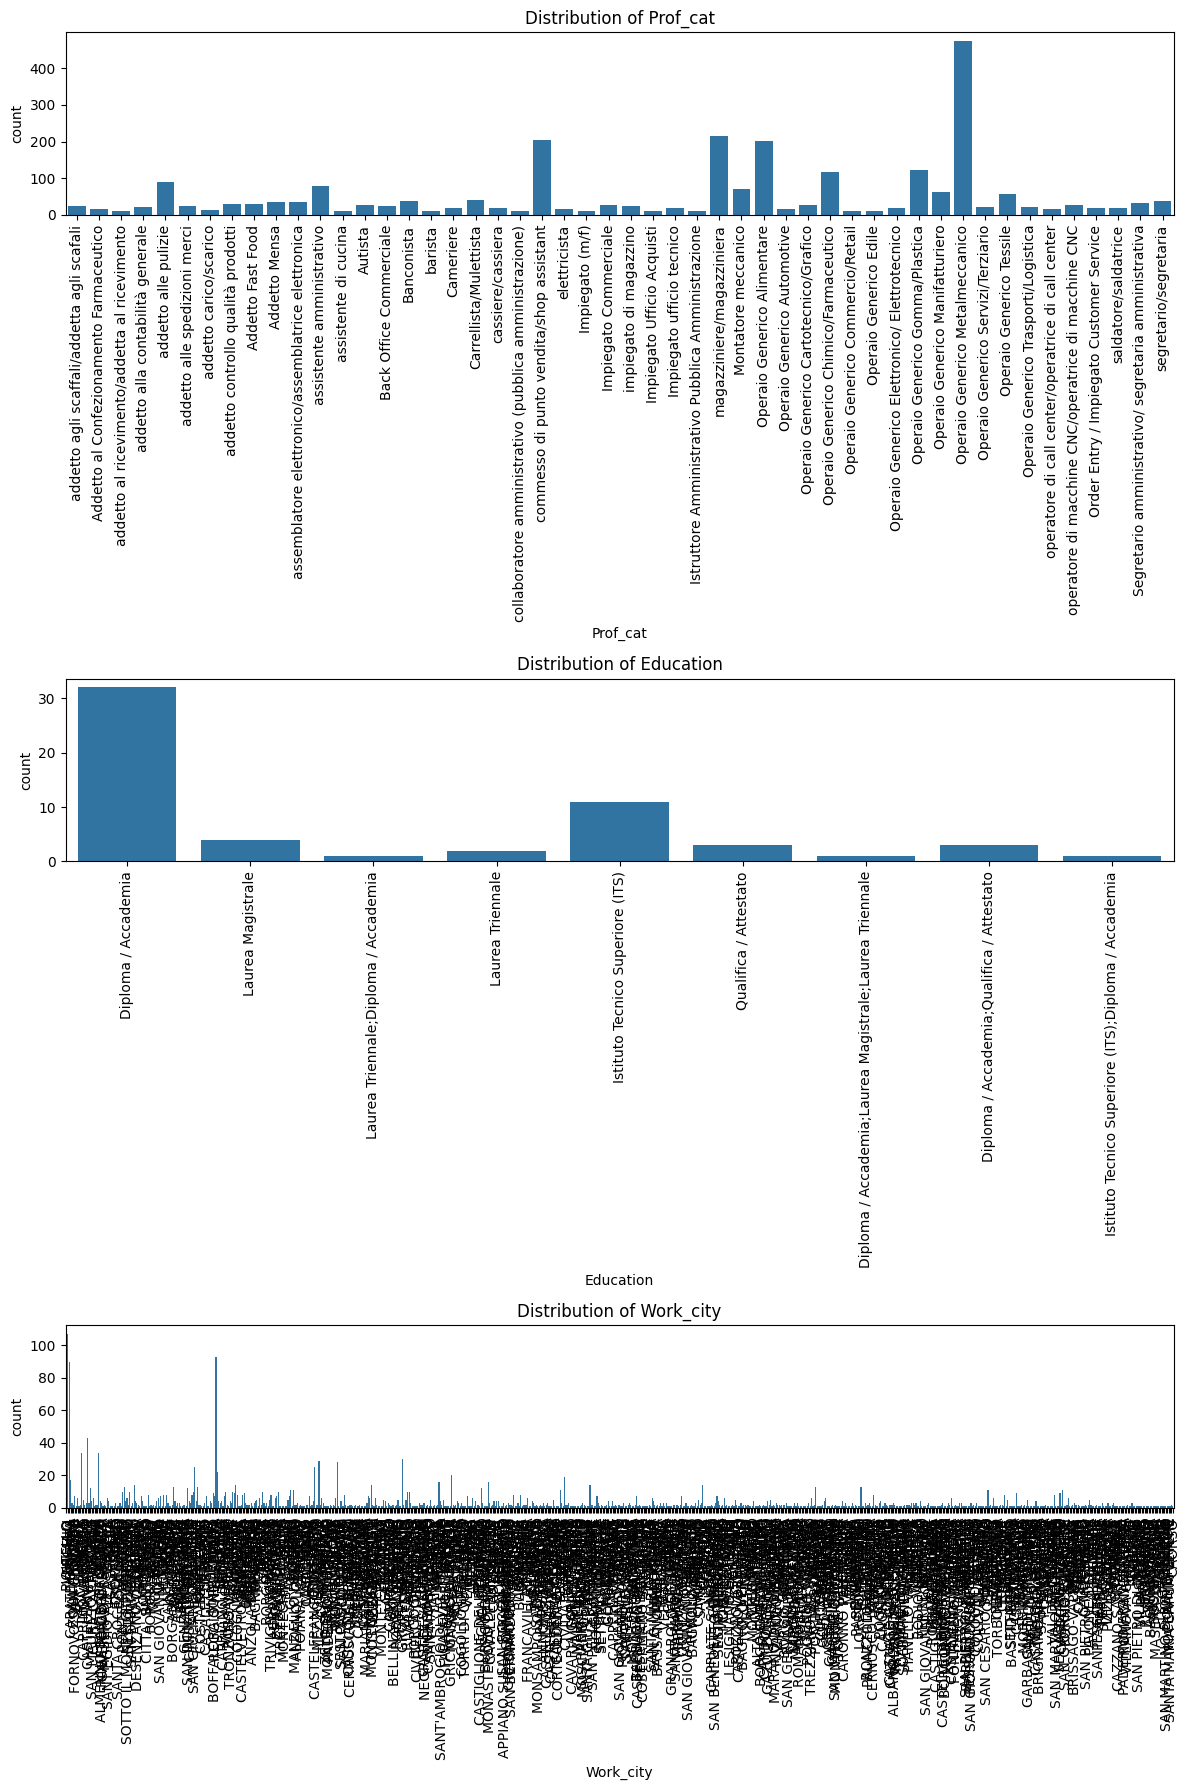

In [9]:
# Plot distribution of categorical features
categorical_features = ['Prof_cat', 'Education', 'Work_city']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, len(categorical_features) * 6))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=job_positions_train, x=feature, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

ValueError: Could not interpret value `Prof_cat` for `x`. An entry with this name does not appear in `data`.

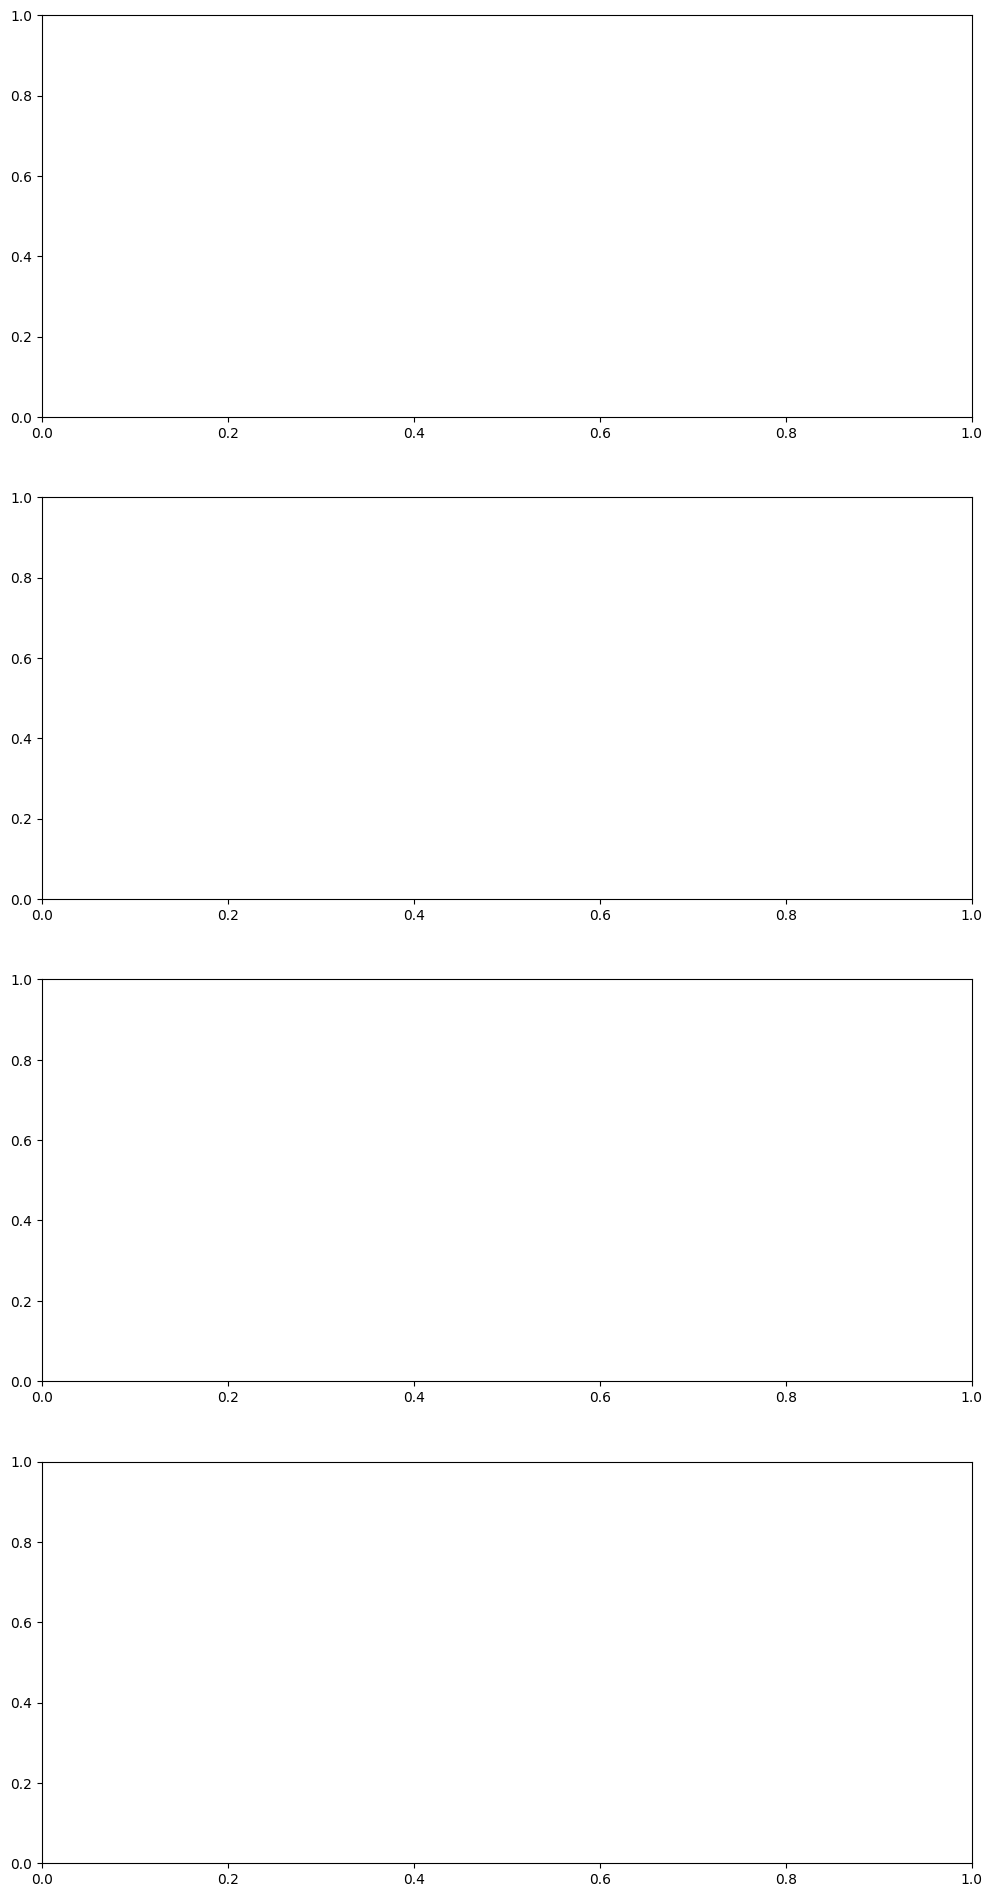

In [19]:
# Plot distribution of categorical features
categorical_features = ['Prof_cat','Prof_cat_int', 'Education', 'Work_city']

fig, axes = plt.subplots(len(categorical_features), 1, figsize=(12, len(categorical_features) * 6))

for i, feature in enumerate(categorical_features):
    sns.countplot(data=candidates_train, x=feature, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

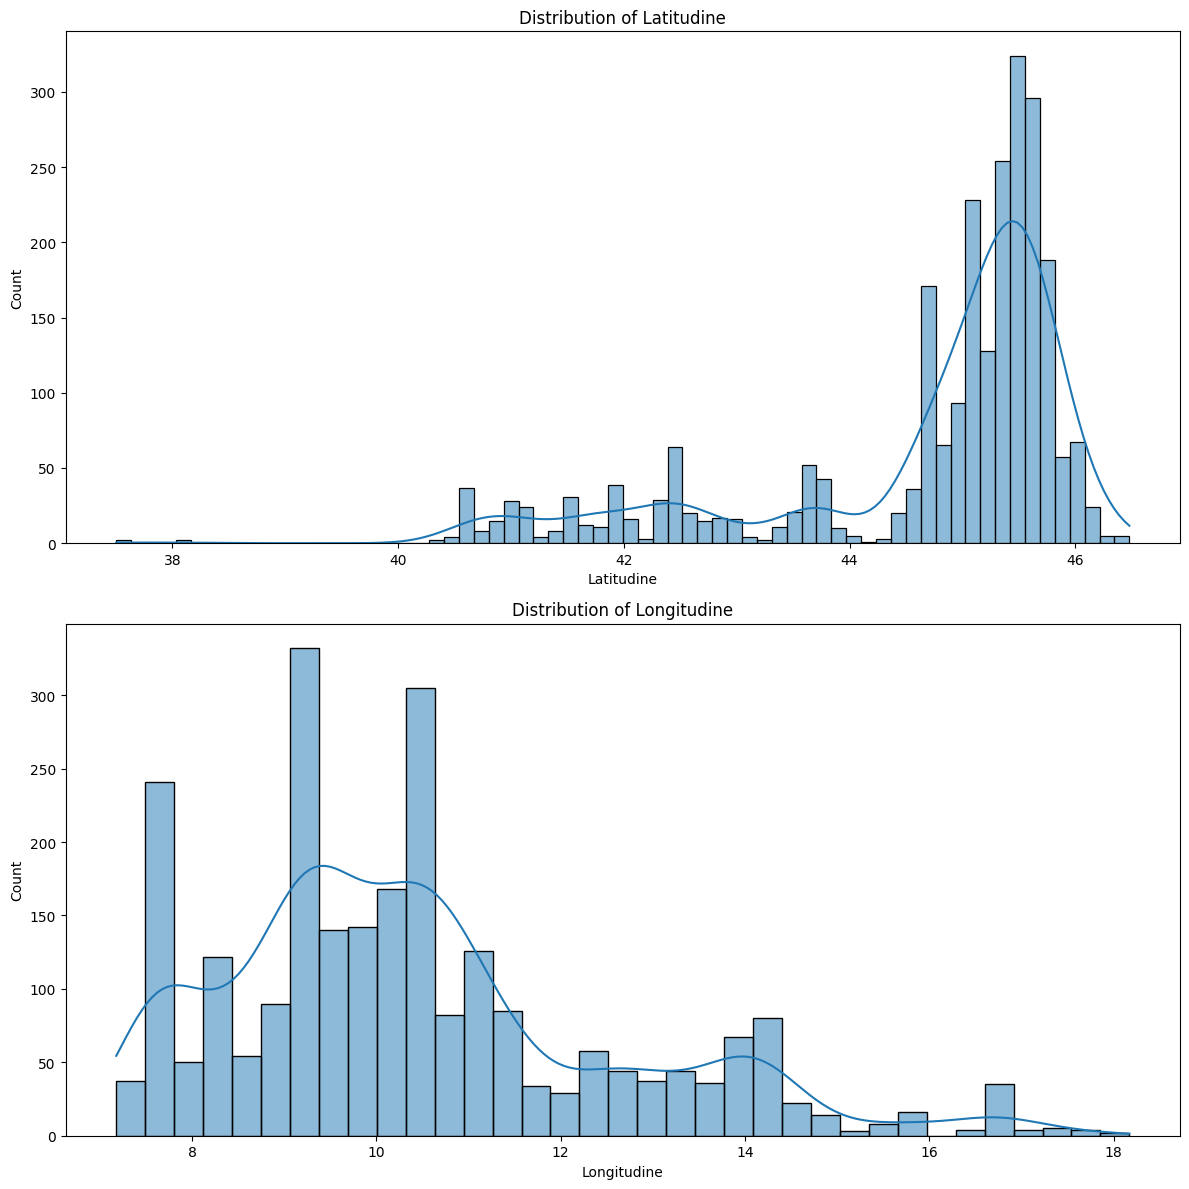

In [10]:
# Plot distribution of numerical features
numerical_features = ['Latitudine', 'Longitudine']

fig, axes = plt.subplots(len(numerical_features), 1, figsize=(12, len(numerical_features) * 6))

for i, feature in enumerate(numerical_features):
    sns.histplot(data=job_positions_train, x=feature, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

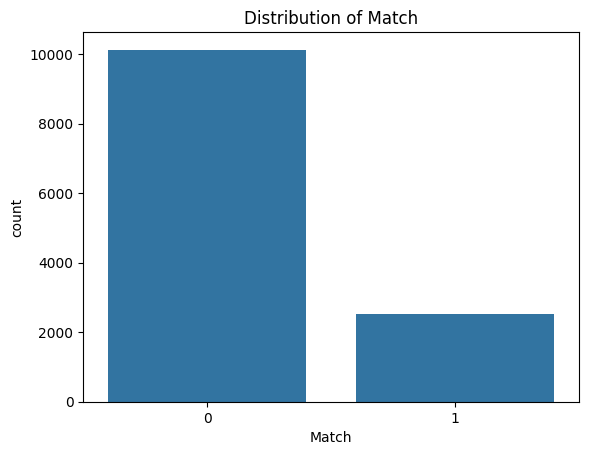

In [13]:
# Plot distribution of the target variable
sns.countplot(data=matches_train, x='Match')
plt.title('Distribution of Match')
plt.show()